In [107]:
import pandas as pd
import numpy as np


In [108]:
#Lets use the features to be able to attain descision tree then ensemble learning
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

import category_encoders as ce 


In [109]:
data = pd.read_csv('StudentsPerformance.csv', delimiter= ',')
data_encoded = data.replace({'gender':{'female':1, 'male':0}, 'lunch':{'standard':1, 'free/reduced':0}, 'test preparation course': {'none':0, 'completed':1}})

In [110]:
data_encoded

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group B,bachelor's degree,1,0,72,72,74
1,1,group C,some college,1,1,69,90,88
2,1,group B,master's degree,1,0,90,95,93
3,0,group A,associate's degree,0,0,47,57,44
4,0,group C,some college,1,0,76,78,75
...,...,...,...,...,...,...,...,...
995,1,group E,master's degree,1,1,88,99,95
996,0,group C,high school,0,0,62,55,55
997,1,group C,high school,0,1,59,71,65
998,1,group D,some college,1,1,68,78,77


In [111]:
label_col = ['parental level of education', 'race/ethnicity']
label_encoder = LabelEncoder()
for name in label_col:
    data_encoded[name] = label_encoder.fit_transform(data_encoded[name])
data_encoded.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,1,1,0,72,72,74
1,1,2,4,1,1,69,90,88
2,1,1,3,1,0,90,95,93
3,0,0,0,0,0,47,57,44
4,0,2,4,1,0,76,78,75


In [112]:
#trying to predict math_score
features = data_encoded.drop('math score', axis = 1).values
target = data_encoded['math score'].values

In [113]:
random  = np.random.seed(41)
train_x, test_x , train_y, test_y = train_test_split(features, target, test_size= 0.25 , random_state = random )

In [114]:
#simple decision tree and check the importance of the features 
#from preprocessing we can see the dataa is normally distributed but not scaled for the math score, reading score and writing score 
#In addition in Trees we dont need to standardize because they work on the probability 

tree = DecisionTreeRegressor()
params = {'max_depth': range(0,5), 'max_features': range(3,8)}
grid_search = GridSearchCV(tree, param_grid = params, cv = 5)
grid_search.fit(train_x,train_y)


c:\Users\batou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\batou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\batou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\batou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.p

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': range(0, 5), 'max_features': range(3, 8)})

In [115]:
print(f'Best parameters are {grid_search.best_params_} \nBest score is {grid_search.best_score_}')


Best parameters are {'max_depth': 4, 'max_features': 6} 
Best score is 0.7853635079166364


In [116]:
#Checking the feature importance from the tree using the best parameters
tree_updated = DecisionTreeRegressor(**grid_search.best_params_)
tree_updated.fit(train_x,train_y)

DecisionTreeRegressor(max_depth=4, max_features=6)

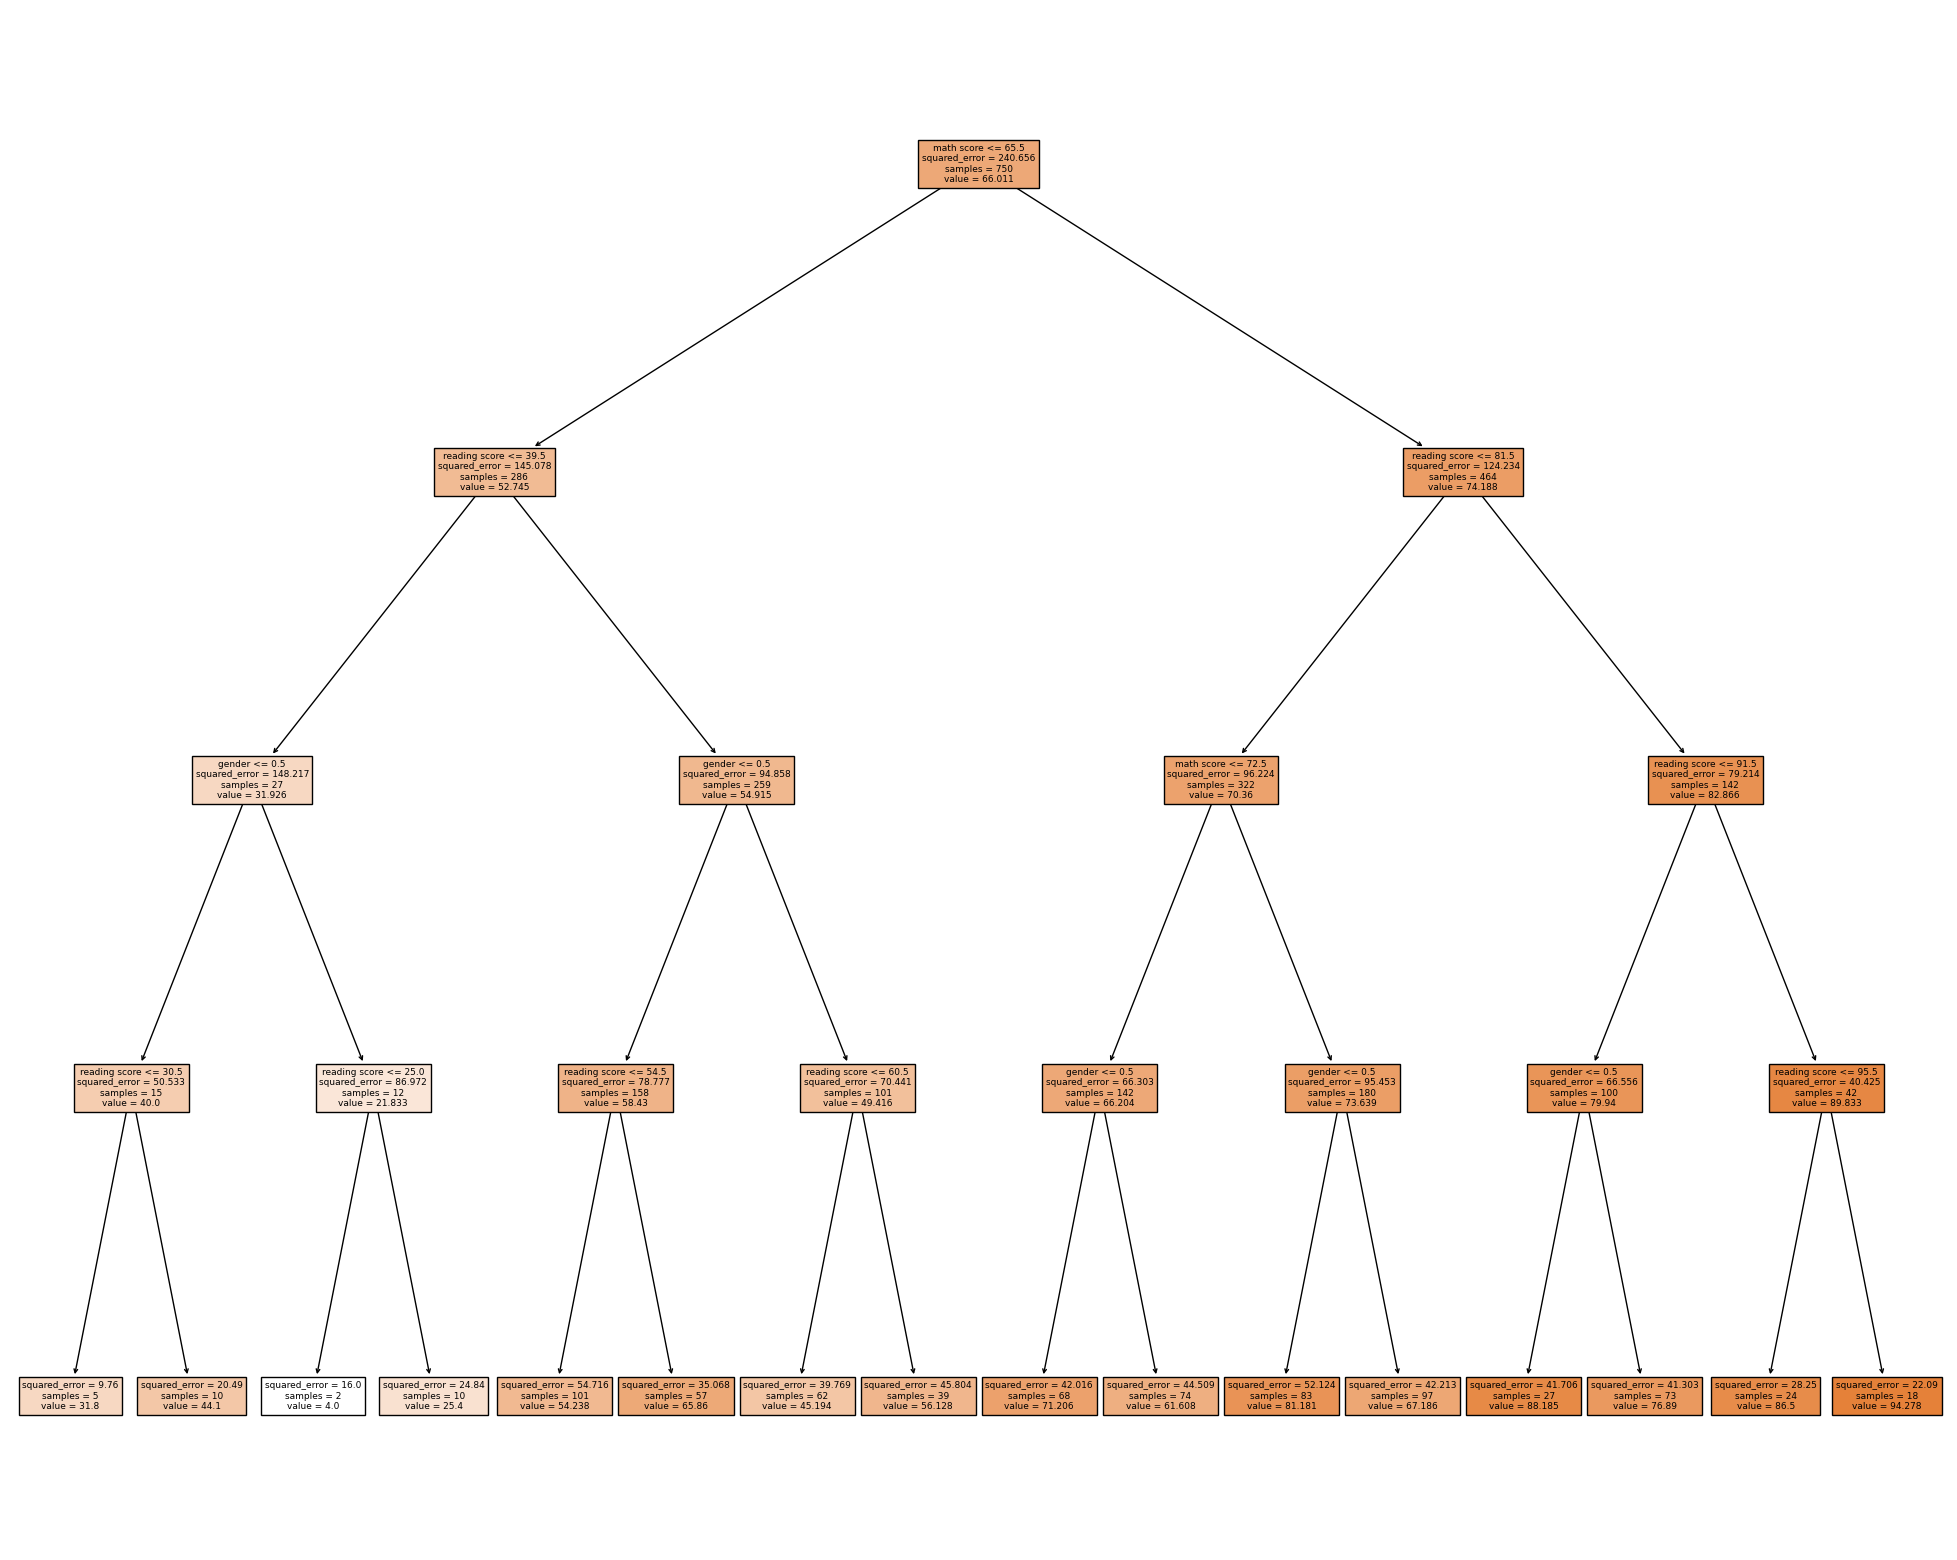

In [117]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = plot_tree(tree_updated, feature_names= data.columns, filled = True)

In [118]:
tree_imp = tree_updated.feature_importances_

features_importance = mutual_info_regression(train_x,train_y)

tree_imp #gender, reading score, and math score

array([0.14654685, 0.        , 0.        , 0.        , 0.        ,
       0.5778102 , 0.27564295])

In [119]:
#score 
from sklearn.metrics import mean_squared_error

target_predict = tree_updated.predict(test_x)
mse = mean_squared_error(test_y,target_predict)

grid_target_predict = grid_search.predict(test_x)
mse_grid = mean_squared_error(test_y, grid_target_predict)

print(f'The error  from tree with best_params is {mse}')


The error  from tree with best_params is 49.57706826453391


## Ensemble Learning

In [121]:
''' 
    Try out Random Classifier, and XGBoost
'''
from sklearn.ensemble import RandomForestRegressor,VotingRegressor

random_forest = RandomForestRegressor()
random_forest_grid = GridSearchCV(random_forest, param_grid= params, cv = 5)
random_forest_grid.fit(train_x,train_y)


c:\Users\batou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\batou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\batou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\Users\batou\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.p

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(0, 5), 'max_features': range(3, 8)})

In [122]:
random_forest_grid.best_params_

{'max_depth': 4, 'max_features': 5}

In [123]:
random_forest_tree = RandomForestRegressor(**random_forest_grid.best_params_)
random_forest_tree.fit(train_x,train_y)

RandomForestRegressor(max_depth=4, max_features=5)

In [124]:
predict_rf = random_forest_tree.predict(test_x)
print(f'mse with random forest {mean_squared_error(test_y, predict_rf)}') #5 percent decrease from decision tree

mse with random forest 41.54033310825248


In [125]:
validate_x, newtest_x, validate_y, newtest_y = train_test_split(test_x,test_y, test_size= 0.30, random_state= random)


In [126]:
validate_x.shape
newtest_x.shape

(75, 7)

In [129]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_validate, RepeatedKFold
from bayes_opt import BayesianOptimization #evaluate the new hyperparam based on the old model 

def f_xgb_model (n_estimators, max_depth, learning_rate ):
    xgb_model = XGBRegressor(n_estimators = int(n_estimators), max_depth = int(max_depth) , learning_rate = int(learning_rate), random_sate = random)
    xgb_model.fit(train_x,train_y)
    score = xgb_model.score(validate_x,validate_y)
    return score
    
    


In [130]:
param_xgb  = {'n_estimators': (100,1000),'max_depth': (0,6), 'learning_rate':(0.01,1)}
xgb_bo = BayesianOptimization(f_xgb_model, param_xgb, random_state= random)
xgb_bo.maximize(20,4)


|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | -4.841e-0 | 0.0725    | 2.762     | 783.3     |
| 2         | -4.841e-0 | 0.6091    | 4.201     | 632.7     |
| 3         | -4.841e-0 | 0.1136    | 4.364     | 145.5     |
| 4         | -4.841e-0 | 0.7844    | 4.505     | 545.7     |
| 5         | -4.841e-0 | 0.2391    | 0.2255    | 707.4     |
| 6         | -4.841e-0 | 0.5672    | 4.713     | 152.7     |
| 7         | -4.841e-0 | 0.7985    | 4.794     | 373.2     |
| 8         | -4.841e-0 | 0.4688    | 3.657     | 587.2     |
| 9         | -4.841e-0 | 0.618     | 3.943     | 659.0     |
| 10        | -4.841e-0 | 0.8012    | 1.811     | 889.3     |
| 11        | -4.841e-0 | 0.3644    | 3.966     | 205.5     |
| 12        | -4.841e-0 | 0.926     | 4.609     | 419.4     |
| 13        | -4.841e-0 | 0.7259    | 1.586     | 810.1     |
| 14        | -4.841e-0 | 0.1359    | 0.3871    | 846.9     |
| 15    

In [131]:
print(xgb_bo.max)
from sklearn.model_selection import cross_val_score


{'target': -4.841304275382541e-05, 'params': {'learning_rate': 0.07249933522323304, 'max_depth': 2.7624511822510867, 'n_estimators': 783.3271735421464}}


In [132]:
#Use the param from optimizer
optimized_param = xgb_bo.max['params']
xgb_model = XGBRegressor(learning_rate = 0.07, max_depth =3, n_estimators = 783, random_state = random)
#define evaluation model 
xgb_model.fit(train_x,train_y)
predict_y = xgb_model.predict(test_x)
print(f'MSE wit XGBoost is {mean_squared_error(predict_y, test_y)}') #41.54033310825248 Random forest and 46 DecisionTree 

MSE is 37.291259415979674


In [135]:
#Evaluate model 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state= random)
scores = cross_val_score(xgb_model, train_x, train_y, cv = cv, scoring = 'neg_mean_squared_error', n_jobs=-1)


In [138]:
scores.mean() #what we got from mse 

-37.57459939853144

Left to do: Visualize the prediction of all three in plots 